# An introduction to using causalinfo

## Setup

We need to import the library, and a few other useful things for displaying the graphs.

In [1]:
from causalinfo import *

In [2]:
# You only need this if you want to draw pretty pictures of the Networks
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

## Creating Variables & Distributions

We start by creating some variables. They each have a name, and a number of states. All our variables have 2 states, 0 and 1. For the purposes of our equations below, we can treat these like False and True.

Note that:
* We can have any number of discrete states, we just using two for these examples.
* I'm using the convention of naming the python variables the same as our causal `Variable`s. It might get confusing otherwise.

In [3]:
s = Variable('s', 2)
a = Variable('a', 2)
b = Variable('b', 2)

Variables just provide a way to identifying or naming something we want to track in `causalinfo`. Rather than assigning them a particular value, we generate a `Distribution` over one or more variables. The easiest way to do this is using a `UniformDist`.

In [4]:
ds = UniformDist(s)

These objects are smart in ipython notebook, and can display themselves. 

In [5]:
ds

,Pr
s,
0,0.5
1,0.5


In [6]:
dsa = UniformDist(s, a)
dsa

We can specify the exact probabilities in a distribution to...

In [7]:
dsa2 = JointDist({s: [.2, .8], a: [.4, .6]})
dsa2

## Creating Equations (Conditional Probability Distributions)

We can now relate these variables using equations that map an input distribution to an output distribution. Some common `Equations` are already available, especially for simple binary states. But you can also create your own mappings --- a topic for later.

In [8]:
same_eq = Equation('SAME', [s], [a], equations.same_)
xnor_eq = Equation('XNOR', [s, a], [b], equations.xnor_)

We can also examine these equations to see what mappings they give...

In [9]:
same_eq

In [10]:
xnor_eq

## Creating Causal Graphs

We can now put these equations together to form causal networks.

In [11]:
gr = CausalGraph([same_eq, xnor_eq])

We can also look at these (if you have the right things installed... more later).

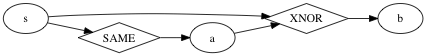

In [12]:
draw(gr.full_network)

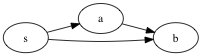

In [13]:
draw(gr.causal_network)

## Generating Joint Distributions

These networks can now be used to generate joint distributions over all the variables. The one thing we need to supply is a distribution over the root variables (those with no parents).

In [14]:
root_dist = UniformDist(s)
j = gr.generate_joint(root_dist)
j

,,,Pr
s,a,b,
0,0,1,0.5
1,1,1,0.5


We can look at the joint distribution of just some of those variables...

In [15]:
j.joint(a, b)

,,Pr
a,b,
0,1,0.5
1,1,0.5


...and we can calculate the mutual information, and conditional mutual information

In [16]:
j.mutual_info(a, b)

0.0

In [17]:
j.mutual_info(s, a)

1.0

In [18]:
j.mutual_info(a, b, s)

0.0

## Interventions

We can also intervene on this graph. We'll need a distribution over the intervention variable if we want to do this.

In [19]:
j_do = gr.generate_joint(root_dist,
                          do_dist=UniformDist(a))

In [20]:
j_do.mutual_info(a, b)

0.0

In [21]:
j_do.mutual_info(a, b, s)

1.0

Note the last calculation is *not* the same as above (it was 0.0). That is because the joint distribution is different under interventions, as we can see...

In [32]:
j_do